# Data Preprocessing for AI



# 피마 인디안 당뇨병 데이터 세트

인터넷에서 구할 수 있는 pima indians diabetes 데이터세트는 여성 768 명을 8가지 지표를 가진다. Pima의 당뇨병 데이터를 살펴보자,

In [14]:
import pandas as pd
import numpy as np

pima = './data/pima-indians-diabetes.data'
df_diabetes = pd.read_csv(pima, header=None)

# Original dataset have not column names
df_diabetes.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"
]
df_diabetes.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1.   Pregnancies
1.   Glucose  
1.   BloodPressure
1.   SkinThickness  
1.   Insulin  
1.   BMI
1.   DiabetesPedigreeFunction
1.   Age
1.   Outcome

## 데이터 살펴보기

정제한 데이터가 어떻게 분포하는지를 살펴보고 여기서 변환해야 할 대상을 판단한다. 여기서는 다음 같은 방법을 사용해서 비율, 지표, 축척 등을 판단한다.

 - 그래프
 - 상관행렬 (Correlation Matrix)

#### 데이터의 형태

<p>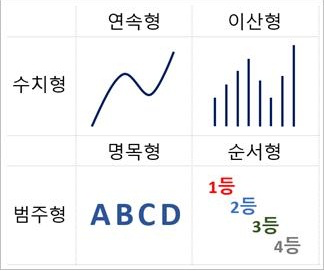</p>
 - http://www.dbguide.net/publishing/img/knowledge/column_img_3256.jpg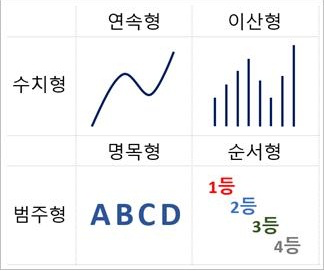

- 명목형: 혈액형, 머리색깔
- 순위형: 1등 2등. 1위 2위.
- 이산형: 나이, 방문자 수
- 연속형: 키, 몸무게

In [7]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NumTimesPrg    768 non-null    int64  
 1   PlGlcConc      768 non-null    int64  
 2   BloodP         768 non-null    int64  
 3   SkinThick      768 non-null    int64  
 4   TwoHourSerIns  768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DiPedFunc      768 non-null    float64
 7   Age            768 non-null    int64  
 8   HasDiabetes    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Q. info를 보고 데이터를 읽어 보자



### 데이터 상관행렬

**상관 행렬**(Correlation Matrix)는 다른 지표 사이의 상관계수를 사용해 상관관계를 이해하는 중요한 도구이다. 값은 -1에서 1까지이며, 값이 1에 더 가까울수록 큰 상관관계가 두 가지 지표 사이에 있다.

In [4]:
corr = df_diabetes.corr()

결과 상관 값을 히트맵으로 표시해서 보면 값과 연관된 속성을 눈으로 확인할 수 있다. 그래프를 보면 환자의 연령, 체질지수가 높을 수록 제2형 당뇨병이 걸릴 확률이 높아보인다.

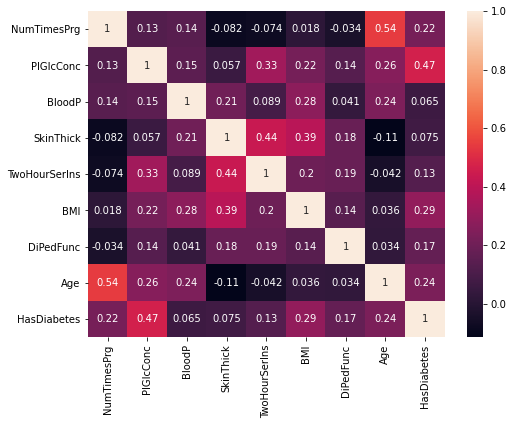

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.show()

### 막대그래프로 척도 비교

데이터를 막대그래프로 그려 데이터 간의 차이를 가시적으로 확인할 수 있다.

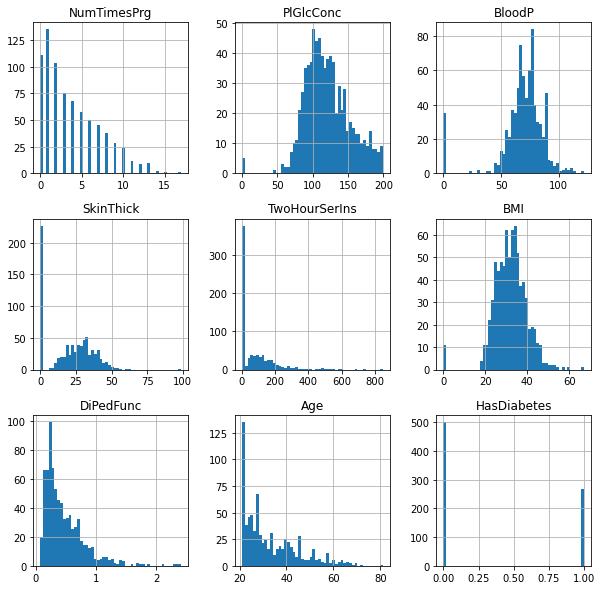

In [5]:
df_diabetes.hist(bins=50, figsize=(10, 10))
plt.show()

#### 데이터 속성 값, 범위, 단위

 - Null(0) 값
 - 측정 단위
 
수치데이터 살펴보기

- Glucose : 중앙값이 120인데 Min이 0으로 결측치 예상,
- BloodPressure: 혈압은 0이 나올수 없으므로 결측치 예상.
- SkinThickness: 피부두께도 0이 나올 수 없다 결측치 예상.
- Insulin: 0이 나올 수 없어 결측치 예상
- BMI: 0이 나올 수 없어 결측치 예상 DiabetesPedigreeFunction Age Outcome


원래 데이터는 각 컬럼별로 다른 범위, 의미를 가진다.불균형한 데이터를 Scikit-learen에서 MinMaxScaler 클래스를 사용하여 데이터의 척도를 조정할 수 있습니다.

## 불균형 데이터 처리

대부분의 기계 학습 알고리즘은 불균형 데이터 세트에서는 제대로 작동하지 않는다.  대부분의 불균형 데이터는 
 - 서로 다른 단위 사용
 - 데이터 범위와 비율의 다름


#### 데이터 충돌 (Data Wrangling)

일반적으로 데이터를 프로세스로 분리하는 작업은 데이터 원본에서 원시 형태로 데이터를 추출하는 것으로 시작하여, 알고리즘(예: 정렬)을 사용하여 원시 데이터를 "제거"하거나, 데이터 구조를 분석한다.

결측치, 특이치 등을 다루게 된다.


#### 데이터 클린징 (Data Cleansing)

데이터 세트, 데이터베이스 등 에서 손상되거나 부정확한 기록을 탐지 및 수정(또는 제거하는)하는 과정이며, **데이터의 불완전하거나, 부정확하거나, 관련 없는 부분을** 확인한 다음, 거친 데이터를 대체, 수정 또는 삭제하는 프로세스이다. 



이런 불균형을 다뤄서 비교할 수 있는 척도의 비율를 가진 데이터로 전환한 후에 학습을 시켜야 한다. 보통 모든 숫자 속성을 값들의 비율에 따라 0~1.0 사이의 실수로 변환해 사용한다. 이런 변환 방법에는 여러 가지가 있다.

### 결측치 다루기

결측값을 처리하는 몇 가지 일반적인 방법은 다음과 같습니다:

- 삭제 사례
- 속성 삭제
- 누락된 모든 값에 대한 속성 평균 사용
- 누락된 모든 값에 대해 속성 중위수 적용
- 누락된 모든 값에 대한 속성 모드 사용
- 회귀 분석을 사용하여 결측값 귀속성



Python 과 Pandas 기반 결측치 관련 :

- [Working with missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html), Pandas documentation
- [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html), Pandas documentation

결측값, 특히 귀책점에 대한 일부 추가 보기는 다음을 참조하십시오.

- [How to Treat Missing Values in Your Data: Part I](https://clevertap.com/blog/how-to-treat-missing-values-in-your-data-part-i/), by Jacob Joseph
- [How to Treat Missing Values in Your Data: Part II](https://clevertap.com/blog/how-to-treat-missing-values-in-your-data-part-ii), by Jacob Joseph

Pandas DataFrame에서 누락된 값을 교체하려는 항목으로 채울 수 있는 많은 방법이 있습니다. 다음은 몇 가지 기본적인 예입니다.


```python
# Drop the columns where all elements are missing values:
df.dropna(axis=1, how='all')

# Drop the columns where any of the elements are missing values
df.dropna(axis=1, how='any')

# Keep only the rows which contain 2 missing values maximum
df.dropna(thresh=2)

# Drop the columns where any of the elements are missing values
df.dropna(axis=1, how='any')

# Fill all missing values with the mean of the particular column
df.fillna(df.mean())

# Fill any missing value in column 'A' with the column median
df['A'].fillna(df['A'].median())

# Fill any missing value in column 'Depeche' with the column mode
df['Depeche'].fillna(df['Depeche'].mode())
```

### 결측 데이터 정제 및 변환

기계 학습 알고리즘은 데이터가 누락되었을 때 제대로 작동하지 않으므로 데이터를 "정리"할 수 있는 솔루션을 찾아야 합니다.

- 가장 쉬운 옵션은 null/zero 값을 가진 모든 환자를 제거하는 것일 수 있지만, 이러한 방법으로 많은 중요한 데이터를 제거할 수 있습니다.

- 또 다른 옵션은 특정 열에 대한 중앙값을 계산하고 zero 또는 null인 모든 곳에서 해당 값을 대체하는 것입니다. 

이 두 번째 방법을 적용하는 방법을 알아보겠습니다.

In [20]:
# Caculate the median value for BMI
median_bmi = df_diabetes['BMI'].median()
# Substitute 0 to media BMI
df_diabetes['BMI'] = df_diabetes['BMI'].replace(to_replace=0, value=median_bmi)

In [21]:
# Caculate the median value for BloodP
median_bloodp = df_diabetes['BloodP'].median()
# Substitute 0 to media BMI
df_diabetes['BloodP'] = df_diabetes['BloodP'].replace(to_replace=0, value=median_bloodp)

In [22]:
# Caculate the median value for PlGlcConc
median_plglcconc = df_diabetes['PlGlcConc'].median()
# Substitute 0 to media BMI
df_diabetes['PlGlcConc'] = df_diabetes['PlGlcConc'].replace(to_replace=0, value=median_plglcconc)

In [23]:
# Caculate the median value for SkinThick
median_skinthick = df_diabetes['SkinThick'].median()
# Substitute 0 to media BMI
df_diabetes['SkinThick'] = df_diabetes['SkinThick'].replace(to_replace=0, value=median_skinthick)

In [24]:
# Caculate the median value for TwoHourSerIns
median_twohourserins = df_diabetes['TwoHourSerIns'].median()
# Substitute 0 to media BMI
df_diabetes['TwoHourSerIns'] = df_diabetes['TwoHourSerIns'].replace(to_replace=0, value=median_twohourserins)

일부 값은 "임신 횟수"와 같이 0이 될 수 있기 때문에 모든 열을 변환하지 못했습니다.

### 특이치(Outliers) 다루기

특이치는 잘못된 데이터 수집의 결과일 수도 있고, 실제로 양호하고 비정상적인 데이터일 수도 있습니다. 

> 한 가지 옵션은 변환을 시도하는 것입니다. 제곱근과 로그 변환은 모두 높은 숫자를 끌어들입니다. 이렇게 하면 특이치가 종속 변수인 경우 가정이 더 잘 작동하고 특이치가 독립 변수인 경우 단일 점의 영향을 줄일 수 있습니다.

데이터셋에 특이치를 남겨둘지 여부를 결정하겠습니다. 그러나 모형의 경우 특이치 데이터를 처리해야 하는 몇 가지 방법이 나와 있습니다.

- [3 methods to deal with outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html), by Alberto Quesada
- [Removing Outliers Using Standard Deviation in Python](https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html), by Punit Jajodia
- [Remove Outliers in Pandas DataFrame using Percentiles](https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles), Stack Overflow
 

### Transformation

Scikit-learn 설명서에서 이 개요는 가장 중요한 사전 처리 변환(예: 표준화, 표준화 및 이중화)에 대한 몇 가지 근거를 제공합니다(몇 가지 다른 변환도 함께 제공).

[Preprocessing data, Scikit-learn](http://scikit-learn.org/stable/modules/preprocessing.html) 참조

원래 데이터는 각 컬럼별로 다른 범위, 의미를 가진다.불균형한 데이터를 Scikit-learen에서 MinMaxScaler 클래스를 사용하여 데이터의 척도를 조정할 수 있습니다.



### MinMaxScaler



가장 많이 이용되는 방법이 Min-Max 값에 대바한 비율을 산출하는 MinMaxSclaer 이다.

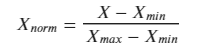

이제 문제에 이 도구를 사용해 보자, 

Sklearn은 [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)를 통해 모든 기능을 0에서 1 사이로 축소할 수 있는 도구를 제공합니다. 

[MinMaxScaler.fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit_transform) 은 학습기에 데이터를 고정하고 변환한다.


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

# summarize scaled data
np.set_printoptions(precision=2)
X_scaled[0:5, :] # 0~5 rows only

array([[0.35, 0.74, 0.59, 0.35, 0.  , 0.5 , 0.23, 0.48],
       [0.06, 0.43, 0.54, 0.29, 0.  , 0.4 , 0.12, 0.17],
       [0.47, 0.92, 0.52, 0.  , 0.  , 0.35, 0.25, 0.18],
       [0.06, 0.45, 0.54, 0.23, 0.11, 0.42, 0.04, 0.  ],
       [0.  , 0.69, 0.33, 0.35, 0.2 , 0.64, 0.94, 0.2 ]])

In [12]:
X.loc[0:5, :]

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30


### 데이터 이진화(이진화 만들기)

- 이진 임계값을 사용하여 데이터를 변환할 수 있습니다. 임계값을 초과하는 모든 값은 1로 표시되고, 같거나 그 이하인 값은 모두 0으로 표시됩니다.

scikit-learn의 Binarizer 클래스를 사용하여 Python에 새로운 이진 특성을 만들 수 있습니다.

In [26]:
from sklearn.preprocessing import Binarizer

#앞서 데이터프레임 df 를 사용하고, array에서 X, Y 배열로 추출한 것을 이용한다.
binarizer = Binarizer(threshold=0.0).fit(X)
X_binarizer = binarizer.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
X_binarizer[0:5, :]

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.]])

### 데이터 표준화 하기

- 표준화는 가우스 분포와 다른 평균 및 표준 편차의로 애트리뷰트를 *평균 0* 과 *표준 편차*의 표준 가우스 분포로 변환하는 기법으로 유용하다.

scikit-learn에서  [StandardScaler class](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)를 사용해서 표준화를 해보겠다.

In [27]:
from sklearn.preprocessing import StandardScaler 

# build scaler from StandardScaler
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

# Summarize transformed data
np.set_printoptions(precision=3)
X_std[0:5, :]

array([[ 0.64 ,  0.848,  0.15 ,  0.907, -0.693,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161,  0.531, -0.693, -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, -1.288, -0.693, -1.103,  0.604, -0.106],
       [-0.845, -0.998, -0.161,  0.155,  0.123, -0.494, -0.921, -1.042],
       [-1.142,  0.504, -1.505,  0.907,  0.766,  1.41 ,  5.485, -0.02 ]])

이 값은 0의 평균 과 1의 표준편차 성질을 가진 결과를 얻을 수 있다.

## 데이터 분할

데이터와 라벨로 분리하고 그리고 학습 데이터와 테스트 데이터로 분할해 보자

- 데이터: 순수 특성 데이터
- 라벨: 데이터 중에서 목표/목적에 맞는 결과 데이터
- 학습 데이터: 훈련에 사용하는 데이터
- 테스트 데이터: 훈련을 검증할 데이터


In [28]:
from sklearn.model_selection import train_test_split

# seperate labels from the rest of the dataset
X = df_diabetes.drop('HasDiabetes', axis=1)
Y = df_diabetes['HasDiabetes'].copy()

test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

ndarray의 슬라이싱 기능을 사용해도 좋다

```python
X = df_diabetes.values[:, 0:8] # all of rows and 0~8 columns
Y = df_diabetes.values[:,8]
```

Series 객체를 사용할 수도 있다.

```python
X = pd.DataFrame(df_diabetes.values[:, 0:8])
Y = pd.DataFrame(df_diabetes.values[:,8])
```

## 학습

SVM(Support Vector Machine) 알고리즘으로 학습 수행후 정확도를 확인한다.

In [16]:
# label  별 평균
Y.value_counts() / Y.count()

0    0.651042
1    0.348958
Name: HasDiabetes, dtype: float64

데이터로 학습

In [29]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# 학습 데이터
svm = SVC()
svm.fit(X_train, y_train)
predict = svm.predict(X_test)

# Result
ac_score = accuracy_score( y_test, predict)
cl_report = classification_report(y_test, predict)

print("정답률: ", ac_score)
print("리포트 = \n", cl_report)

정답률:  0.7598425196850394
리포트 = 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83       162
           1       0.76      0.49      0.60        92

    accuracy                           0.76       254
   macro avg       0.76      0.70      0.71       254
weighted avg       0.76      0.76      0.74       254



Scaled 데이터로 처리.

In [30]:
# 학습 데이터
svm = SVC()
svm.fit(X_std, Y)
predict = svm.predict(X_std)

# Result
ac_score = accuracy_score( Y, predict)
cl_report = classification_report(Y, predict)

print("Scaled 정답률: ", ac_score)
print("리포트 = \n", cl_report)

Scaled 정답률:  0.82421875
리포트 = 
               precision    recall  f1-score   support

           0       0.83      0.93      0.87       500
           1       0.82      0.63      0.72       268

    accuracy                           0.82       768
   macro avg       0.82      0.78      0.79       768
weighted avg       0.82      0.82      0.82       768



KNN 알고리즘으로 시도해 보자

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Fitting K-NN on our scaled data set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, Y)

accuracy_score( Y, knn.predict(X_scaled))

0.8229166666666666